In [1]:
%matplotlib inline

In [2]:
import os 
import numpy as np
import pandas as pd
import seaborn as sbn
import nibabel as nib
from matplotlib import pyplot as plt
from nilearn import plotting as nlp

/home/surchs/conda/envs/hbm/lib/python3.6/site-packages/nilearn/plotting/__init__.py:20: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/surchs/conda/envs/hbm/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/surchs/conda/envs/hbm/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/surchs/conda/envs/hbm/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/surchs/conda/envs/hbm/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/surchs/conda/envs/hbm/lib/python3.6/site-packages/ipykern

/home/surchs/conda/envs/hbm/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


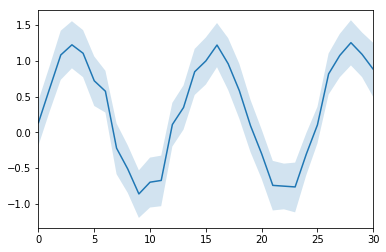

In [6]:
gammas = sbn.load_dataset("gammas")

In [ ]:
[(sub, feat) for sub in range(n_sub) for feat in range(n_feat)]

In [9]:
[(i, j) for j in range(3) for i in range(6)]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2)]

In [8]:
gammas

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992
5,0.0,IPS,5,-0.073709
6,0.0,IPS,6,3.542734
7,0.0,IPS,7,0.080169
8,0.0,IPS,8,1.547083
9,0.0,IPS,9,2.827153


In [5]:
data.shape

(10, 31)

In [73]:
# Paths
root_p = '/home/surchs/sim_big/PROJECT/abide_hps/'
# Pheno
sample_p = os.path.join(root_p, 'pheno', 'psm_abide1.csv')
validation_p = os.path.join(root_p, 'pheno', 'validation_abide1.csv')
# Data
mask_p = os.path.join(root_p, 'mask', 'MIST_mask.nii.gz')
temp_p = os.path.join(root_p, 'mask', 'MIST_20.nii.gz')
label_p = os.path.join(root_p, 'mask', 'roi_label_scale_20_overlap.csv')
weight_fc_p = os.path.join(root_p, 'weights', 'weights_fc_psm.npy')
weight_ct_p = os.path.join(root_p, 'weights', 'weights_ct_psm.npy')
weight_fc_validation_p = os.path.join(root_p, 'weights', 'weights_fc_validation.npy')
weight_ct_validation_p = os.path.join(root_p, 'weights', 'weights_ct_validation.npy')
subtype_fc_p = os.path.join(root_p, 'subtypes', 'subtypes_fc.npz')
subtype_ct_p = os.path.join(root_p, 'subtypes', 'subtypes_ct.npz')

features_p = os.path.join(root_p, 'figures', 'features.png')
pos_p = os.path.join(root_p, 'figures', 'pos_feature.png')
neg_p = os.path.join(root_p, 'figures', 'neg_feature.png')

In [22]:
fc_s = np.load(subtype_fc_p)['subtypes']
ct_s = np.load(subtype_ct_p)
mask_i = nib.load(mask_p)
mask = mask_i.get_data().astype(bool)
temp = nib.load(temp_p).get_data()

In [6]:
import warnings
warnings.filterwarnings('ignore')

Positive:
net 5, sub 5
Negative: 
net 7, sub 5

In [13]:
fc_s.shape

(5, 57790, 20)

In [15]:
# Get the positive subtype
pos_s = np.zeros(mask.shape)
pos_s[mask] = fc_s[4,...,4]
pos_i = nib.Nifti1Image(pos_s, affine=mask_i.affine, header=mask_i.header)

In [17]:
# Get the negative subtype
neg_s = np.zeros(mask.shape)
neg_s[mask] = fc_s[4,...,6]
neg_i = nib.Nifti1Image(neg_s, affine=mask_i.affine, header=mask_i.header)

In [55]:
# Get the seeds
pos_seed = np.zeros(mask.shape)
pos_seed[temp==5] = 5
pseed_i = nib.Nifti1Image(pos_seed, affine=mask_i.affine, header=mask_i.header)

neg_seed = np.zeros(mask.shape)
neg_seed[temp==7] = 7
nseed_i = nib.Nifti1Image(neg_seed, affine=mask_i.affine, header=mask_i.header)

## Negative

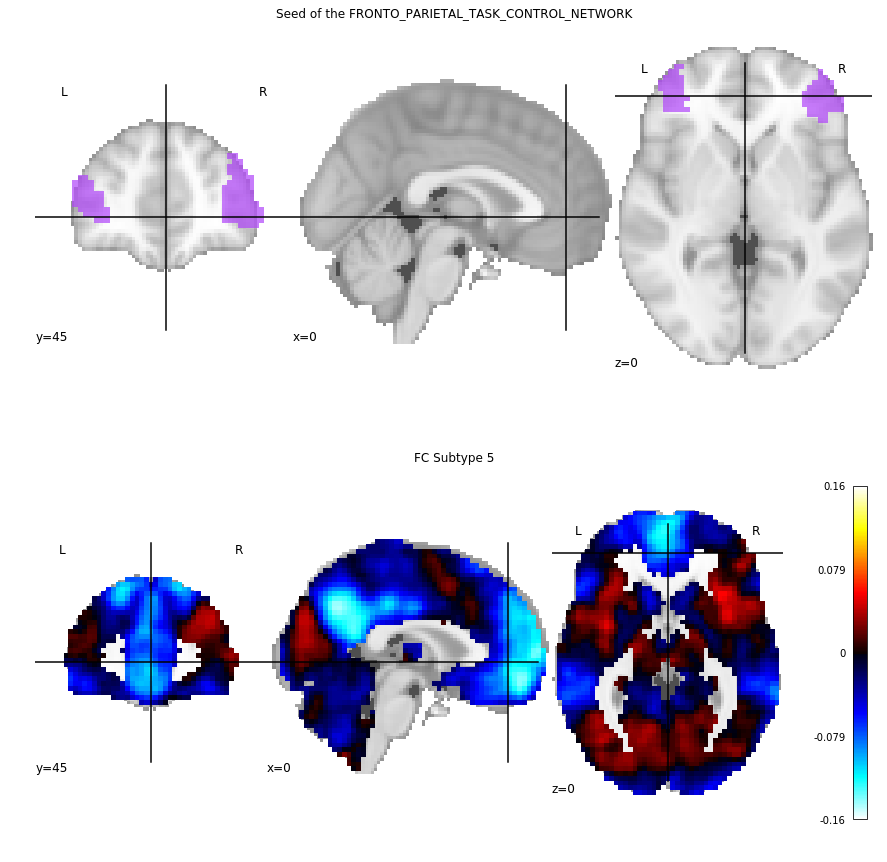

In [74]:
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)
nlp.plot_roi(nseed_i, draw_cross=True, vmin=1, vmax=8, cut_coords=(0, 45, 0), axes=ax1)
nlp.plot_stat_map(neg_i, cut_coords=(0, 45, 0), axes=ax2)
ax1.set_title('Seed of the FRONTO_PARIETAL_TASK_CONTROL_NETWORK')
ax2.set_title('FC Subtype 5')
f.savefig(neg_p, dpi=300, bbox_inches='tight', pad_inches=0)

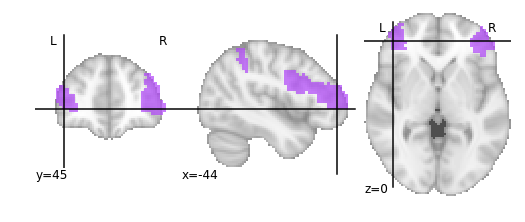

In [53]:

nlp.plot_roi(nseed_i, draw_cross=True, vmin=1, vmax=8, cut_coords=(-44, 45, 0))

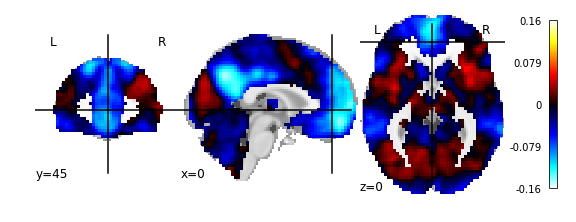

In [59]:
nlp.plot_stat_map(neg_i, cut_coords=(0, 45, 0))

## Positive

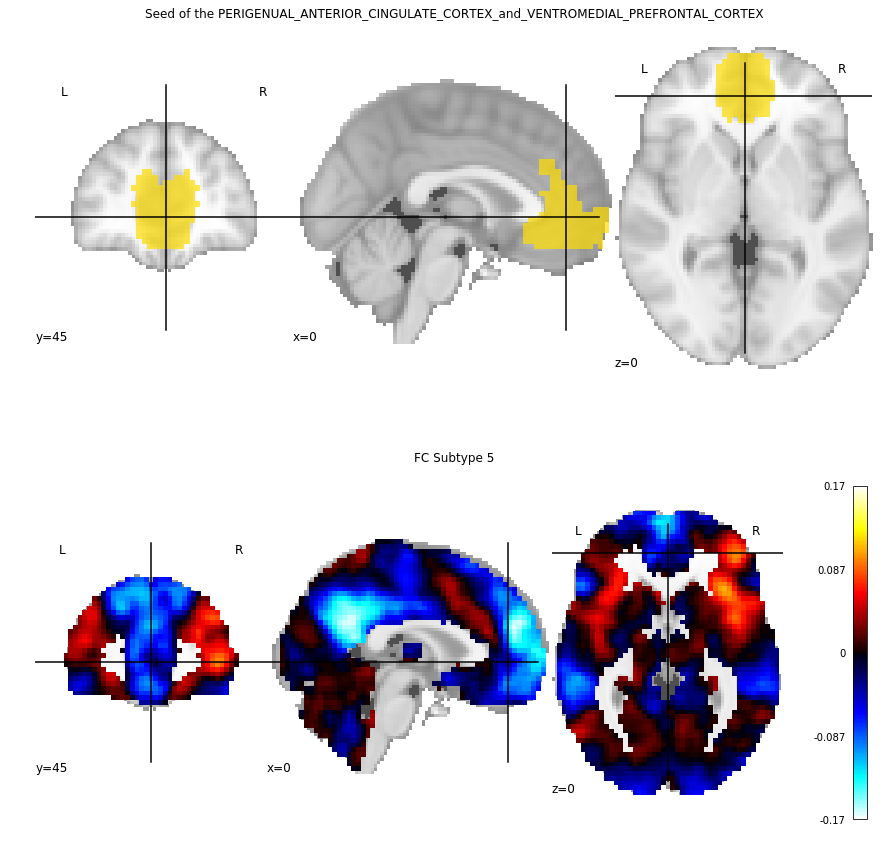

In [75]:
f = plt.figure(figsize=(15,15))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)
nlp.plot_roi(pseed_i, draw_cross=True, vmin=1, vmax=8, cut_coords=(0, 45, 0), axes=ax1)
nlp.plot_stat_map(pos_i, cut_coords=(0, 45, 0), axes=ax2)
ax1.set_title('Seed of the PERIGENUAL_ANTERIOR_CINGULATE_CORTEX_and_VENTROMEDIAL_PREFRONTAL_CORTEX')
ax2.set_title('FC Subtype 5')
f.savefig(pos_p, dpi=300, bbox_inches='tight', pad_inches=0)

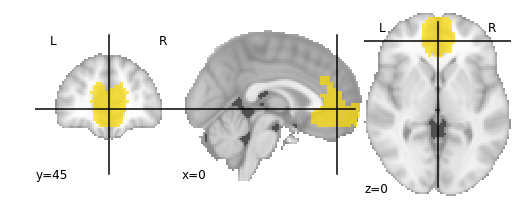

In [56]:
nlp.plot_roi(pseed_i, draw_cross=True, vmin=1, vmax=8, cut_coords=(0, 45, 0))

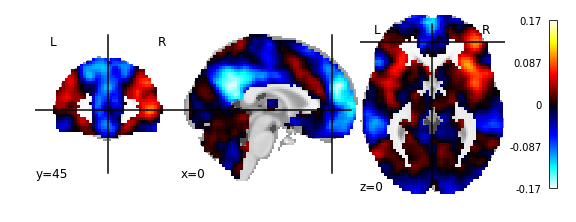

In [57]:
nlp.plot_stat_map(pos_i, cut_coords=(0, 45, 0))